# trainONE model9_LIKE

WITH SENTENCE: 나는 항상 너를 좋아해

likeONE = {0:'I', 1:'you', 2:'like'}

- likeONE.h5(1): 200/200/200 / epoch=50  / acc:94.7%
- likeONE.h5 (안만듬): 200/400/400 / epoch=50  / acc:77.8%
- likeONE.h5(2): 200/600/600 / epoch=50  / acc:100%
- likeONE.h5(3): 400/600/600 / epoch=50  / acc:100%
- likeONE.h5(4):     epoch=50
- likeONE.h5(5):     epoch=50

In [1]:
import numpy as np
import os

os.environ['CUDA_VISIBLE_DEVICES'] = '1'
os.environ['TF_FORCE_GPU_ALLOW_GROWTH'] = 'true'

In [2]:
#드라이브에 접근할 수 있도록 아래 코드 입력
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
from itertools import chain

likeONE = {0:'I', 1:'you', 2:'like'}
actions = []

for v in likeONE.values():
    actions.append(v)

print(actions)

['I', 'you', 'like']


In [31]:
data = np.concatenate([
                       # I : 400
                       np.load('/content/drive/MyDrive/SOOWA/datasetONE/modelONE9/likeONE/one_SL_I_1635833732.npy'),
                       np.load('/content/drive/MyDrive/SOOWA/datasetONE/modelONE9/likeONE/one_SL_I_1635837071.npy'),
                       # like : 600
                       np.load('/content/drive/MyDrive/SOOWA/datasetONE/modelONE9/likeONE/one_SL_like_1635833732.npy'),
                       np.load('/content/drive/MyDrive/SOOWA/datasetONE/modelONE9/likeONE/one_SL_like_1635836682.npy'),
                       np.load('/content/drive/MyDrive/SOOWA/datasetONE/modelONE9/likeONE/one_SL_like_1635837071.npy'),
                       # you : 600
                       np.load('/content/drive/MyDrive/SOOWA/datasetONE/modelONE9/likeONE/one_SL_you_1635833732.npy'),
                       np.load('/content/drive/MyDrive/SOOWA/datasetONE/modelONE9/likeONE/one_SL_you_1635836682.npy'),
                       np.load('/content/drive/MyDrive/SOOWA/datasetONE/modelONE9/likeONE/one_SL_you_1635837071.npy')
], axis=0)

data.shape

(1520, 10, 90)

In [32]:
x_data = data[:, :, :-1]
labels = data[:, 0, -1]

print(x_data.shape)
print(labels.shape)
print(len(actions))

(1520, 10, 89)
(1520,)
3


In [33]:
from tensorflow.keras.utils import to_categorical

y_data = to_categorical(labels, num_classes=len(actions))

y_data.shape

(1520, 3)

In [34]:
from sklearn.model_selection import train_test_split

x_data = x_data.astype(np.float32)
y_data = y_data.astype(np.float32)

x_train, x_val, y_train, y_val = train_test_split(x_data, y_data, test_size=0.1, random_state=2021)

print(x_train.shape, y_train.shape)
print(x_val.shape, y_val.shape)

(1368, 10, 89) (1368, 3)
(152, 10, 89) (152, 3)


In [35]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

model = Sequential([
    LSTM(64, activation='relu', input_shape=x_train.shape[1:3]),
    Dense(32, activation='relu'),
    Dense(len(actions), activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 64)                39424     
_________________________________________________________________
dense_6 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_7 (Dense)              (None, 3)                 99        
Total params: 41,603
Trainable params: 41,603
Non-trainable params: 0
_________________________________________________________________


In [36]:
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau

history = model.fit(
    x_train,
    y_train,
    validation_data=(x_val, y_val),
    epochs=50,
    callbacks=[
        ModelCheckpoint('models/model.h5', monitor='val_acc', verbose=1, save_best_only=True, mode='auto'),
        ReduceLROnPlateau(monitor='val_acc', factor=0.5, patience=50, verbose=1, mode='auto')
    ]
)

Epoch 1/50
43/43 [==============================] - 2s 15ms/step - loss: 15.1559 - acc: 0.4649 - val_loss: 2.1834 - val_acc: 0.6842

Epoch 00001: val_acc improved from -inf to 0.68421, saving model to models/model.h5
Epoch 2/50
43/43 [==============================] - 0s 9ms/step - loss: 1.5783 - acc: 0.6425 - val_loss: 1.0024 - val_acc: 0.6053

Epoch 00002: val_acc did not improve from 0.68421
Epoch 3/50
43/43 [==============================] - 0s 9ms/step - loss: 0.8594 - acc: 0.7588 - val_loss: 0.5721 - val_acc: 0.7763

Epoch 00003: val_acc improved from 0.68421 to 0.77632, saving model to models/model.h5
Epoch 4/50
43/43 [==============================] - 0s 9ms/step - loss: 0.6511 - acc: 0.8158 - val_loss: 0.6243 - val_acc: 0.7303

Epoch 00004: val_acc did not improve from 0.77632
Epoch 5/50
43/43 [==============================] - 0s 9ms/step - loss: 0.5721 - acc: 0.8194 - val_loss: 0.6735 - val_acc: 0.7697

Epoch 00005: val_acc did not improve from 0.77632
Epoch 6/50
43/43 [====

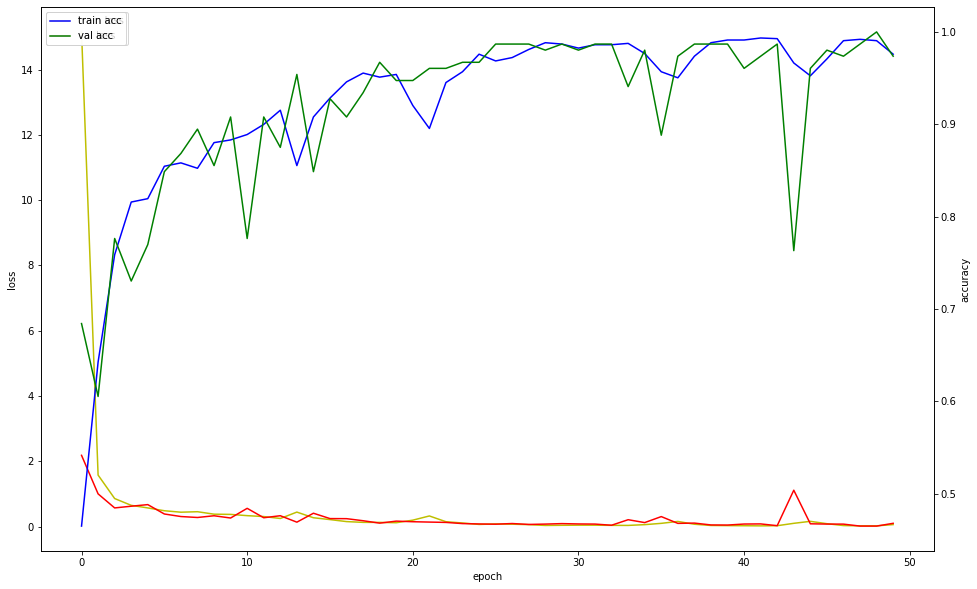

In [37]:
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots(figsize=(16, 10))
acc_ax = loss_ax.twinx()

loss_ax.plot(history.history['loss'], 'y', label='train loss')
loss_ax.plot(history.history['val_loss'], 'r', label='val loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
loss_ax.legend(loc='upper left')

acc_ax.plot(history.history['acc'], 'b', label='train acc')
acc_ax.plot(history.history['val_acc'], 'g', label='val acc')
acc_ax.set_ylabel('accuracy')
acc_ax.legend(loc='upper left')

plt.show()

In [38]:
from sklearn.metrics import multilabel_confusion_matrix
from tensorflow.keras.models import load_model

model = load_model('models/model.h5')

y_pred = model.predict(x_val)

multilabel_confusion_matrix(np.argmax(y_val, axis=1), np.argmax(y_pred, axis=1))

array([[[118,   0],
        [  0,  34]],

       [[ 84,   0],
        [  0,  68]],

       [[102,   0],
        [  0,  50]]])

In [39]:
from keras.models import load_model

model.save('likeONE.h5')

from google.colab import files
files.download('likeONE.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>